## Final Project Submission

Please fill out:
* Student name: Hiten Patel 
* Student pace: Full Time
* Scheduled project review date/time: September 19th: 1pm
* Instructor name: James M Irving, Ph.D
* Blog post URL:
https://hpatel530.github.io/blog_number_3_by_hiten_patel


# Introduction 

The project is based on King County Housing data and how we can use this information to increase the sale price of a house. 

The purpose of this project is to build a model based on linear regression to help identify what features are important in a home to maximize the selling price of a home. The final model will go through many iterations and tests to ensure that it is the best fit model. 

# OBTAIN
>**Importing libraies/packages**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

/Users/Hiten.K.Patel/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


>**Importing and previewing data**

In [2]:
df = pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns', None)
print (df.shape)
df.head()

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# SCRUB


## Inspecting the Columns 

>**Inspecting the Column's Data Type, Column Name**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

>**Inspecting Column's Unique Values**

In [4]:
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

>**Checking for Null Values** 

In [5]:
nulls = df.isna().sum()
null_percent = nulls[nulls>0] / len(df)
null_percent.to_frame('% Null').style.background_gradient(cmap='Reds')

,% Null
waterfront,0.110015
view,0.002917
yr_renovated,0.177895


>**Replace Null Values in 'waterfront, 'view' and 'yr_renovated'**

In [6]:
#Inspecting 'waterfront' column and replacing Null values with the median value 
print(df['waterfront'].nunique())
print(df['waterfront'].unique())
print(df['waterfront'].value_counts())

df['waterfront'] = df['waterfront'].fillna(df['waterfront'].median())

2
[nan  0.  1.]
0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [7]:
#Inspecting 'views' column and replacing Null values with the median value 
print(df['view'].nunique())
print(df['view'].unique())
print(df['view'].value_counts())

df['view'] = df['view'].fillna(df['view'].median())

5
[ 0. nan  3.  4.  2.  1.]
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [8]:
#Inspecting 'yr_renovated' column and replacing Null values with the median value 
print(df['yr_renovated'].nunique())
print(df['yr_renovated'].unique())
print(df['yr_renovated'].value_counts())

df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_renovated'].median())

70
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [9]:
#Confirm changes to dataset
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

>**Replacing '?' in 'sqft_basement'**

In [10]:
df.sqft_basement = df.sqft_basement.map(lambda x: x.replace('?', "0"))


In [11]:
#Confirm changes 
print(df['sqft_basement'].value_counts())

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
          ...  
3000.0        1
602.0         1
2500.0        1
935.0         1
283.0         1
Name: sqft_basement, Length: 304, dtype: int64


## Visually Examining Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd60defe7f0>,
      dtype=object)

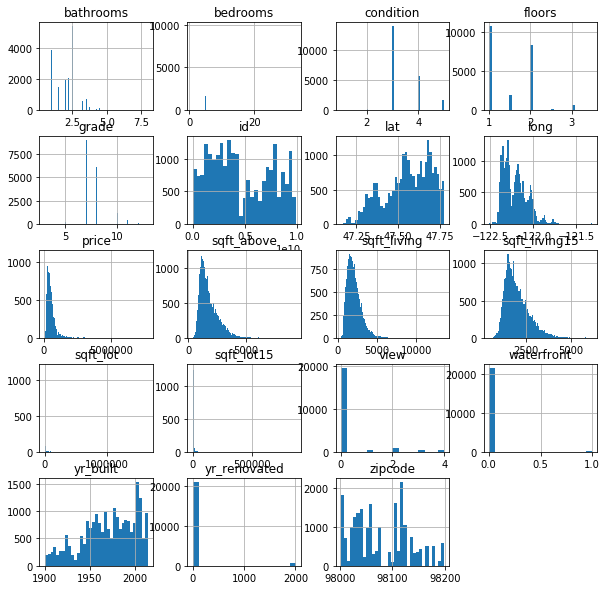

In [12]:
df.hist(bins='auto', figsize=(10,10))

In [13]:
def joint_plots(df, col, target='price'):
    """Created function to plot each feature vs target variable"""
    plots = sns.jointplot(data=df, x=col, y=target, kind='reg')
    plt.suptitle(f'{col} vs {target}')
    return plots

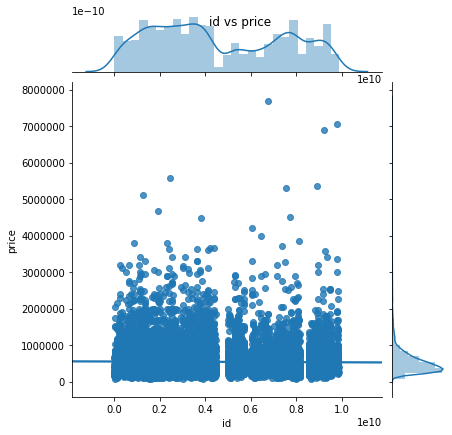

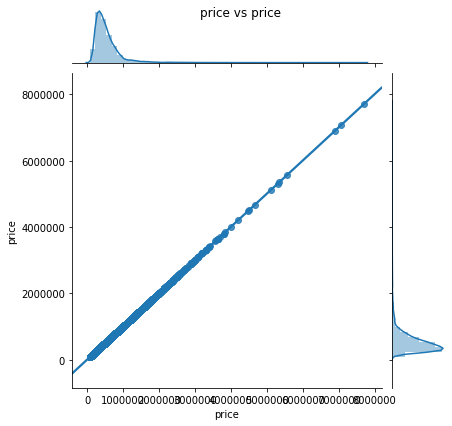

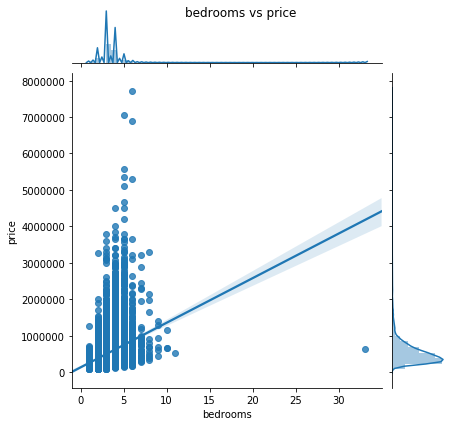

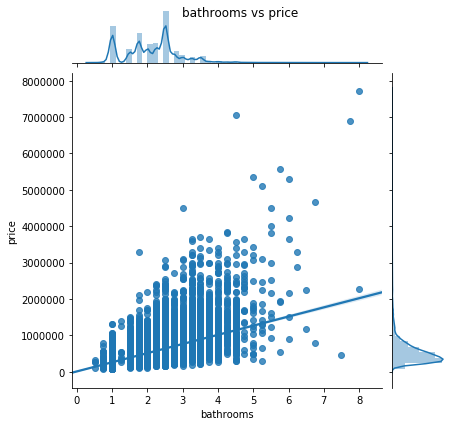

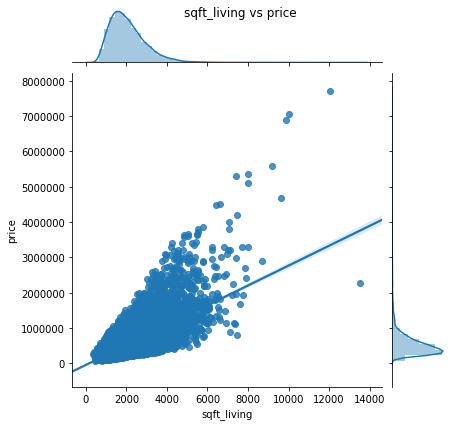

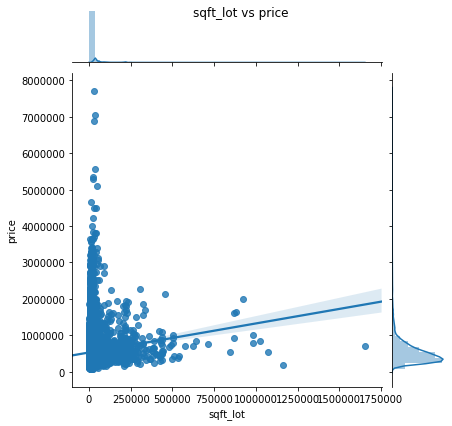

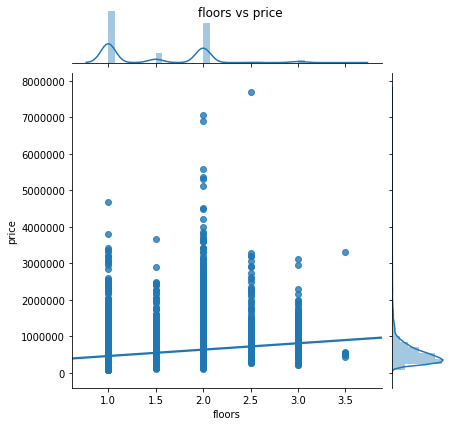

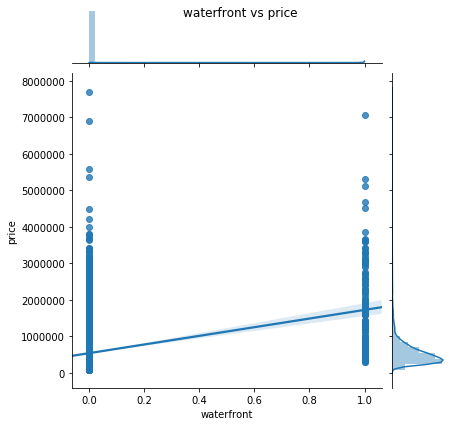

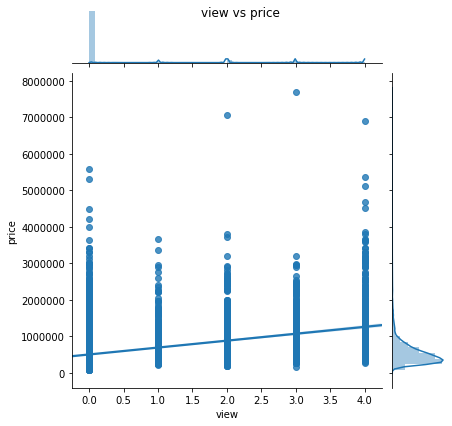

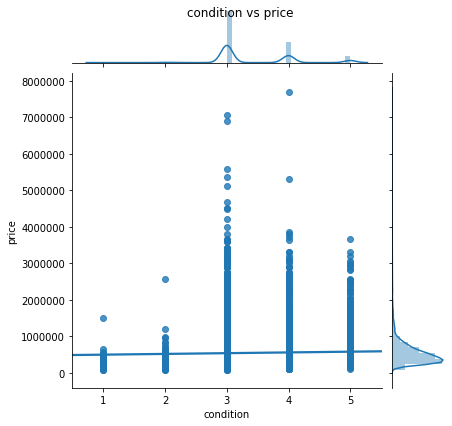

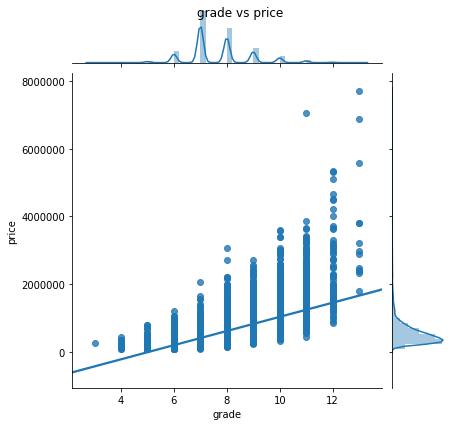

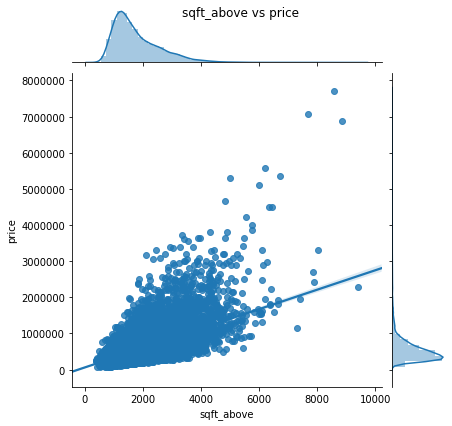

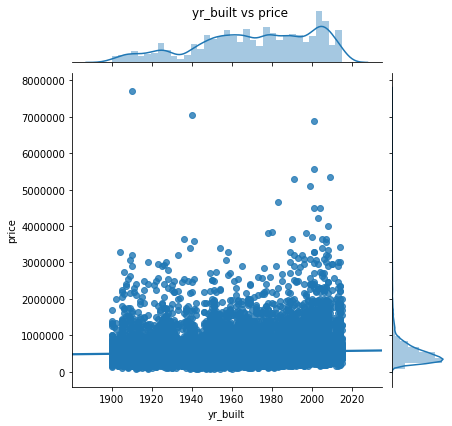

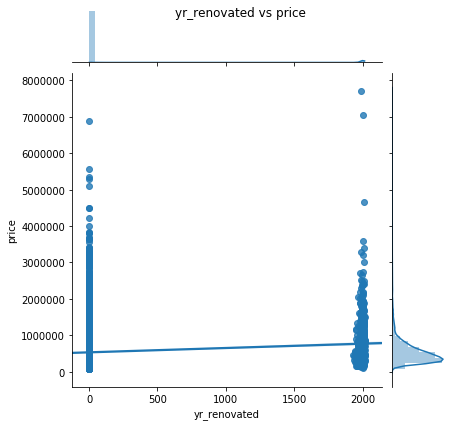

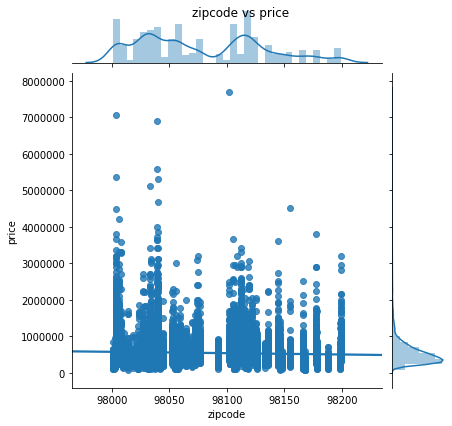

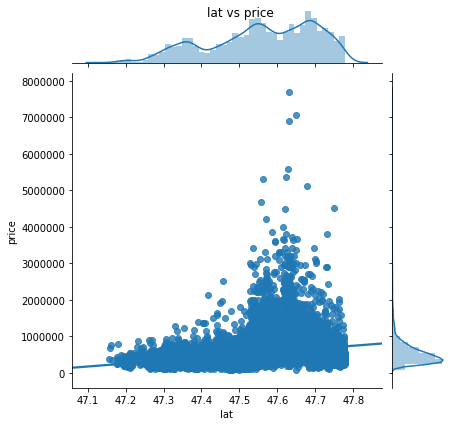

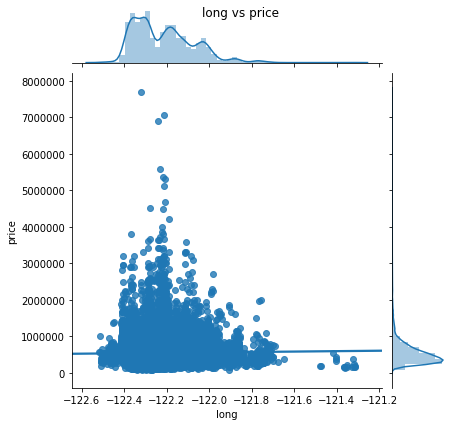

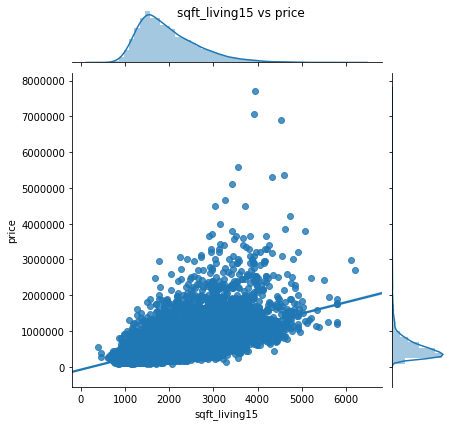

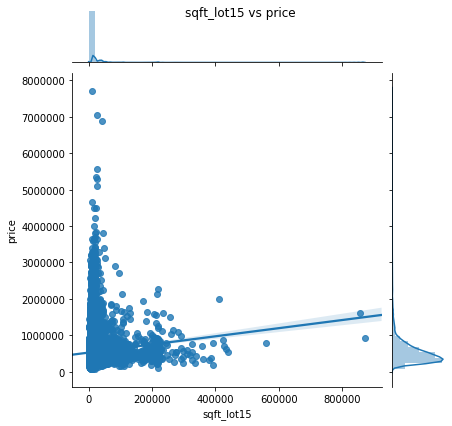

In [14]:
num_cols = list(df.select_dtypes('number').columns)
for col in num_cols: 
    joint_plots(df, col)

>**Observations:**
>* bedrooms has a linear relationship, and vertical stacking - categorical data

>* bathrooms has a linear relationship, and vertical stacking - categorical data

>* sqft_living has a linear relationship, contains outliers, skewed right

>* sqft_lot has a slight linear relationship,contains outliers, skewed right

>* floors slight linear relationship, and vertical stacking - categorical data

>* waterfront slight linear relationship, and vertical stacking - categorical data

>* view slight linear relationship, and vertical stacking - categorical data

>* condition has no linear relationship - vertical stacking - categorical data 

>* grade slight linear relationship, and vertical stacking - categorical data

>* sqft_above has a linear relationship, contains outliers, skewed right

>* yr_built slight linear relationship - possible categorical variables  

>* yr_renovated slight linear relationship - vertical stacking - categorical data 

>* zipcode no linear relationship, vertical stacking - possible categorical variable 

>* lat very little linear relationship
* long has no linear relationship 

>* sqft_living15 has a linear relationship, contains outliers, skewed right

>* sqft_lot15 slight linear relationship, contains outliers, skewed right

## Multicolinearity Analysis 

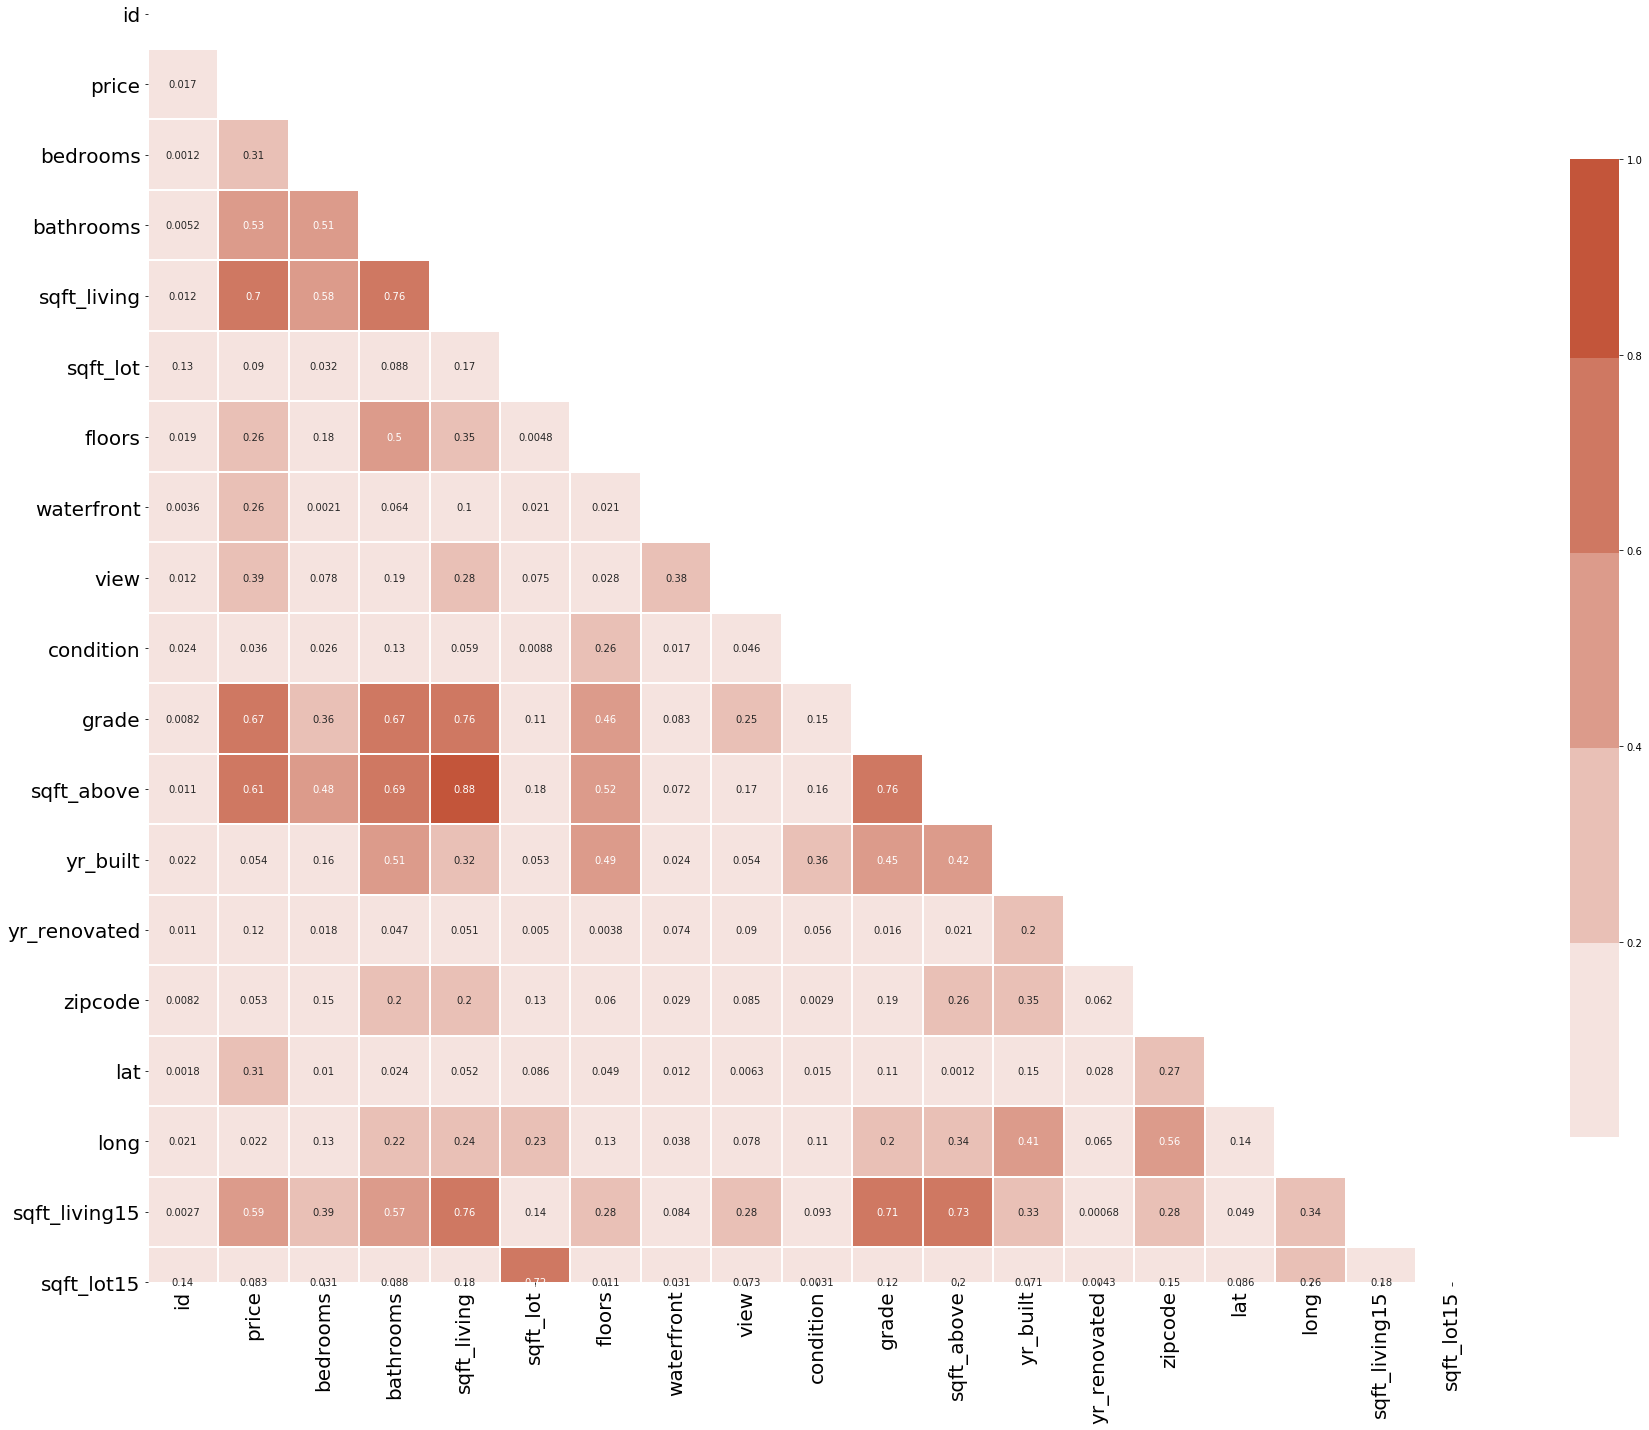

In [15]:
#Visually checking multicolinearity with a heat map 

plt.figure(figsize=(30,30))
plt.xticks(size=20)
plt.yticks(size=20)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask,k=0)] = True
sns.heatmap(df.corr().abs(),mask=mask,cmap=sns.diverging_palette(220, 20, n=10),
            annot=True,center=0,linewidths=1,
            square=True, cbar_kws={'shrink':0.6})

In [16]:
def color_red(val):
    """Created a function to apply red color to any values above .75"""
    color = 'red' if val > .75 else 'black'
    return 'color: %s' % color 


>**Apply correlation method to the data. Any values above .75 will be highlighted in red**

In [17]:
df.corr().abs().style.applymap(color_red)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.016772,0.001150,0.005162,0.012241,0.131911,0.018608,0.003599,0.011772,0.023803,0.008188,0.010799,0.021617,0.010612,0.008211,0.001798,0.020672,0.002701,0.138557
price,0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.053953,0.117855,0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.002127,0.078354,0.026496,0.356563,0.479386,0.155670,0.017900,0.154092,0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,0.126479,0.665838,0.686668,0.507173,0.047177,0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,0.059445,0.762779,0.876448,0.318152,0.051060,0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,0.004814,0.021459,0.075054,0.008830,0.114731,0.184139,0.052946,0.004979,0.129586,0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,0.004814,1.000000,0.020797,0.028414,0.264075,0.458794,0.523989,0.489193,0.003793,0.059541,0.049239,0.125943,0.280102,0.010722
waterfront,0.003599,0.264306,0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.024487,0.073939,0.028923,0.012157,0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.054452,0.090339,0.085059,0.006321,0.077702,0.278928,0.073083
condition,0.023803,0.036056,0.026496,0.126479,0.059445,0.008830,0.264075,0.016648,0.045622,1.000000,0.146896,0.158904,0.361592,0.055808,0.002888,0.015102,0.105877,0.093072,0.003126


>**Observations:**
* Strong correlation between sqft_living and bathrooms
* Strong correlation between sqft_living and grade
* Strong correlation between sqft_living and sqft_above 
* Strong correlation between sqft_living and sqft_living15
* Strong correlation between grade and sqft_above 

## Converting Datatypes

In [18]:
#Converting datatypes to appropriate date type
#converting categorical data to str

df['bedrooms'] = df['bedrooms'].astype('str')
df['bathrooms'] = df['bathrooms'].astype('str')
df['floors'] = df['floors'].astype('str')
df['waterfront'] = df['waterfront'].astype('str')
df['condition'] = df['condition'].astype('str')
df['grade'] = df['grade'].astype('str')
df['zipcode'] = df['zipcode'].astype('str')

#Converting values in view to either 1 or 0, then converting to a str

df['view'] = df['view'].map(lambda x: 1 if x > 0 else 0)
df['view'] = df['view'].astype('str')

#Converting values in yr_renovated to either 1 or 0, then converting to str

df['yr_renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df['yr_renovated'] = df['yr_renovated'].astype('str')

#converting continuous data to int

df['price'] = df['price'].astype('int')

#converting data from object>int, then converting value to either 1 or 0, converting back to str
df['sqft_basement'] = df['sqft_basement'].astype('float')
df['sqft_basement'] = df['sqft_basement'].astype('int')
df.sqft_basement = df.sqft_basement.map(lambda x: 1 if x > 0 else 0)
df['sqft_basement'] = df['sqft_basement'].astype('str')                                      

In [19]:
#Adding a column for age of house 
df['Age'] = 2020 - df['yr_built']

In [20]:
#Dropping the following columns 

#No linear relationship 
df.drop('lat', axis=1, inplace=True)
df.drop('long', axis=1, inplace=True)

#Too many unique values 
df.drop('date', axis=1, inplace=True)

#Created a column 'Age' as a replacement
df.drop('yr_built', axis=1, inplace=True )

#Irrevalent column 
df.drop('id', axis=1, inplace=True)

In [21]:
#confirming changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          21597 non-null  int64 
 1   bedrooms       21597 non-null  object
 2   bathrooms      21597 non-null  object
 3   sqft_living    21597 non-null  int64 
 4   sqft_lot       21597 non-null  int64 
 5   floors         21597 non-null  object
 6   waterfront     21597 non-null  object
 7   view           21597 non-null  object
 8   condition      21597 non-null  object
 9   grade          21597 non-null  object
 10  sqft_above     21597 non-null  int64 
 11  sqft_basement  21597 non-null  object
 12  yr_renovated   21597 non-null  object
 13  zipcode        21597 non-null  object
 14  sqft_living15  21597 non-null  int64 
 15  sqft_lot15     21597 non-null  int64 
 16  Age            21597 non-null  int64 
dtypes: int64(7), object(10)
memory usage: 2.8+ MB


# Explore Data

>**Objectives: Answer the following questions during exploratory data analysis;**

1. Which columns to treat as numerical data and which columns to treat as categorical data?

2. Is there any multicollinearity among the data? If so, how will the data be handled?

3. Are there any outliers? If so, which method will be used to remove the outliers?

In [22]:
#Overlooking numerical data 
df.describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,Age
count,2.159700e+04,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,2080.321850,1.509941e+04,1788.596842,1986.620318,12758.283512,49.000324
std,3.673681e+05,918.106125,4.141264e+04,827.759761,685.230472,27274.441950,29.375234
min,7.800000e+04,370.000000,5.200000e+02,370.000000,399.000000,651.000000,5.000000
25%,3.220000e+05,1430.000000,5.040000e+03,1190.000000,1490.000000,5100.000000,23.000000
50%,4.500000e+05,1910.000000,7.618000e+03,1560.000000,1840.000000,7620.000000,45.000000
75%,6.450000e+05,2550.000000,1.068500e+04,2210.000000,2360.000000,10083.000000,69.000000
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000,6210.000000,871200.000000,120.000000


>**Observations:**
* Contains extreme outliers 
* Age of houses range from 5 years to 120

## Visually Inspecting Target Variable -'Prices'

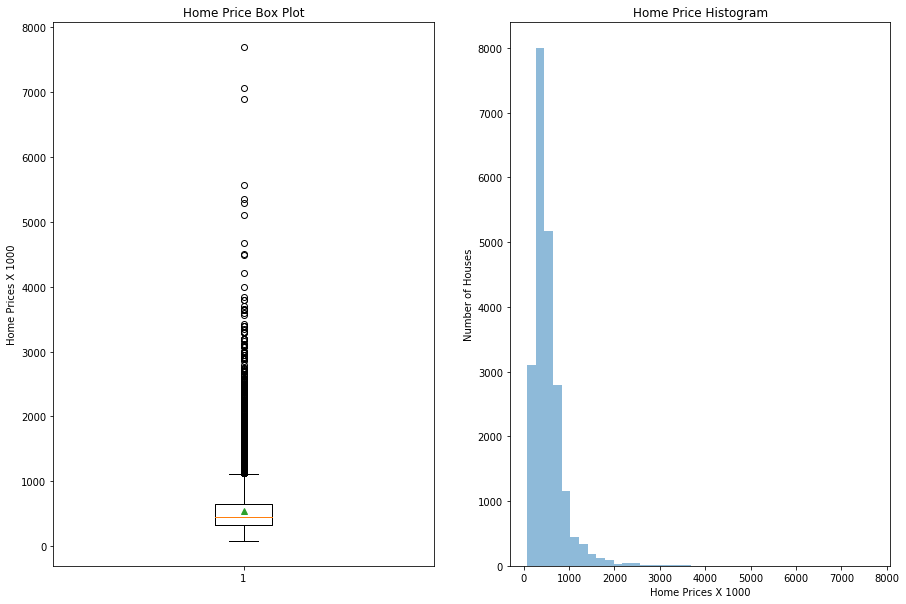

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax1.boxplot(df.price/1000, showmeans=True)
ax1.set_ylabel('Home Prices X 1000')
ax1.set_title('Home Price Box Plot')
ax2.hist(df.price/1000, bins=40, alpha=0.5)
ax2.set_ylabel('Number of Houses')
ax2.set_xlabel('Home Prices X 1000')
ax2.set_title('Home Price Histogram')
plt.show()

**Observations**

* Extreme outliers
* Positively skewed right 

## Check for Multicollinearity

In [24]:
#Removing target value 'price' and checking correlation among feats
data_pred = df.iloc[:,2:]
data_pred.corr().abs().style.applymap(color_red)

,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,Age
sqft_living,1.000000,0.173453,0.876448,0.756402,0.184342,0.318152
sqft_lot,0.173453,1.000000,0.184139,0.144763,0.718204,0.052946
sqft_above,0.876448,0.184139,1.000000,0.731767,0.195077,0.424037
sqft_living15,0.756402,0.144763,0.731767,1.000000,0.183515,0.326377
sqft_lot15,0.184342,0.718204,0.195077,0.183515,1.000000,0.070777
Age,0.318152,0.052946,0.424037,0.326377,0.070777,1.000000


(7, -0.5)

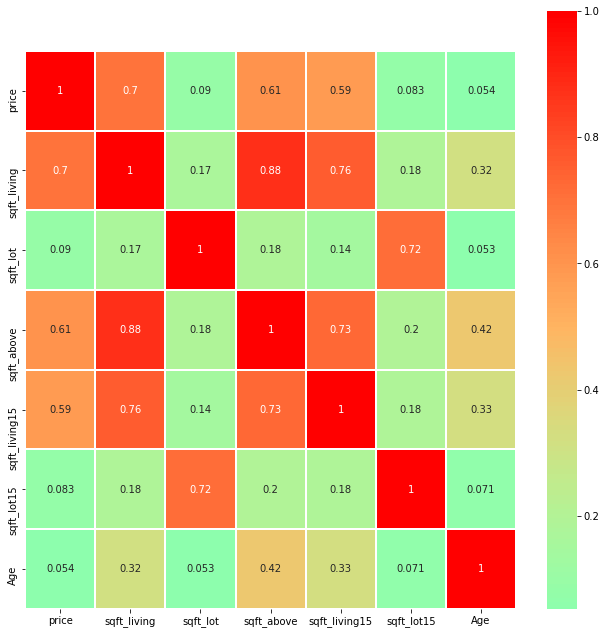

In [25]:
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(df.corr().abs(), center=0, annot=True, linewidths=1, cmap='rainbow');
ax.set_ylim(len(df.corr())-0, -0.5)

>**Observations:**
* Price and 'sqft_living have the strongest correlation.
* 'Sqft_living' has a strong correlation with 'sqft_above' and 'sqft_living15' which is indicated by a .75 or higher
* 'Sqft_lot and 'sqft_lot15 have a .72 correlation. 
* 'Sqft-above and 'sqft_living have a .73 correlation.


## Model 1: Most Original Data 

In [26]:
#Setting up variables for model fitting 
outcome = 'price'
df.columns = [col.replace('.', '_') for col in df.columns]
x_cols = list(df.columns)
x_cols.remove(outcome)
x_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'zipcode',
 'sqft_living15',
 'sqft_lot15',
 'Age']

>**Create Function to run models**

In [27]:
def make_model(train_df, x_cols): 
    """Creating a function to contruct and run a model. The function will also create a qq plot and homoscedasticity check"""

    predictors = '+'.join(x_cols)
    formula = outcome + '~' + predictors
    model = ols(formula=formula, data=train_df).fit()
    display(model.summary())
    fig,ax = plt.subplots(ncols=2,figsize=(10,5))
    fig = sm.graphics.qqplot(model.resid, stats.distributions.norm, fit=True, line='45', ax=ax[0])
    ax[0].set(title='QQ Plot')
    ax[1].scatter(x=model.predict(), y=model.resid)
    ax[1].axhline(0,color='k',zorder=-1)
    ax[1].set(ylabel='Residuals',title='Homoscedasticity Check', xlabel="Target Values")
    
    return model

>**Using the function I created to construct and run model 1**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     815.8
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:42:28   Log-Likelihood:            -2.8767e+05
No. Observations:               21597   AIC:                         5.756e+05
Df Residuals:                   21459   BIC:                         5.767e+05
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.209e+04   8.08e+04      0.273      0.785   -1.36e+05     1.8e+05
bedrooms[T.10]     -3.247e+05   8.76e+04     -3.707      0.000   -4.96e+05   -1.53e+05
bedrooms[T.11]     -6.077e+04   1.49e+05     -0.408      0.683   -3.53e+05    2.31e+05
bedrooms[T.2]       6308.3016   1.14e+04      0.553      0.580    -1.6e+04    2.87e+04
bedrooms[T.3]       1.516e+04   1.14e+04      1.325      0.185   -7264.296    3.76e+04
bedrooms[T.33]      4.605e+04   1.49e+05      0.310      0.757   -2.45e+05    3.37e+05
bedrooms[T.4]       -786.6642   1.17e+04     -0.067      0.946   -2.37e+04    2.21e+04
bedrooms[T.5]       -1.57e+04   1.23e+04     -1.274      0.203   -3.98e+04    8446.035
bedrooms[T.6]      -4.761e+04    1.5e+04     -3.174      0.002    -7.7e+04   -1.82e+04
bedrooms[T.7]      -1.872e+05   2.75e+04     -6.813      0.000   -2.41e+05   -1.33e+05
bedrooms[T.8]      -5.873e+04   4.35e+04     -1.349      0.177   -1.44e+05    2.66e+04
bedrooms[T.9]       -1.69e+05   6.81e+04     -2.480      0.013   -3.03e+05   -3.54e+04
bathrooms[T.0.75]  -7019.0629   7.64e+04     -0.092      0.927   -1.57e+05    1.43e+05
bathrooms[T.1.0]    2.978e+04   7.42e+04      0.402      0.688   -1.16e+05    1.75e+05
bathrooms[T.1.25]  -5.644e+04   8.91e+04     -0.633      0.527   -2.31e+05    1.18e+05
bathrooms[T.1.5]     2.26e+04   7.43e+04      0.304      0.761   -1.23e+05    1.68e+05
bathrooms[T.1.75]   1.961e+04   7.42e+04      0.264      0.792   -1.26e+05    1.65e+05
bathrooms[T.2.0]    1.982e+04   7.42e+04      0.267      0.790   -1.26e+05    1.65e+05
bathrooms[T.2.25]   3.901e+04   7.43e+04      0.525      0.599   -1.07e+05    1.85e+05
bathrooms[T.2.5]    2.803e+04   7.42e+04      0.378      0.706   -1.17e+05    1.74e+05
bathrooms[T.2.75]   2.845e+04   7.43e+04      0.383      0.702   -1.17e+05    1.74e+05
bathrooms[T.3.0]    4.573e+04   7.44e+04      0.615      0.539      -1e+05    1.92e+05
bathrooms[T.3.25]   8.919e+04   7.45e+04      1.197      0.231   -5.69e+04    2.35e+05
bathrooms[T.3.5]    4.744e+04   7.45e+04      0.637      0.524   -9.86e+04    1.93e+05
bathrooms[T.3.75]   1.311e+05   7.53e+04      1.741      0.082   -1.65e+04    2.79e+05
bathrooms[T.4.0]     1.32e+05   7.55e+04      1.750      0.080   -1.59e+04     2.8e+05
bathrooms[T.4.25]   2.119e+05   7.63e+04      2.777      0.005    6.23e+04    3.61e+05
bathrooms[T.4.5]    1.496e+05   7.59e+04      1.970      0.049     734.223    2.98e+05
bathrooms[T.4.75]   4.074e+05   8.08e+04      5.042      0.000    2.49e+05    5.66e+05
bathrooms[T.5.0]    2.821e+05   8.13e+04      3.468      0.001    1.23e+05    4.41e+05
bathrooms[T.5.25]   2.534e+05   8.55e+04      2.964      0.003    8.58e+04    4.21e+05
bathrooms[T.5.5]    4.191e+05   8.89e+04      4.714      0.000    2.45e+05    5.93e+05
bathrooms[T.5.75]   3.161e+05   1.07e+

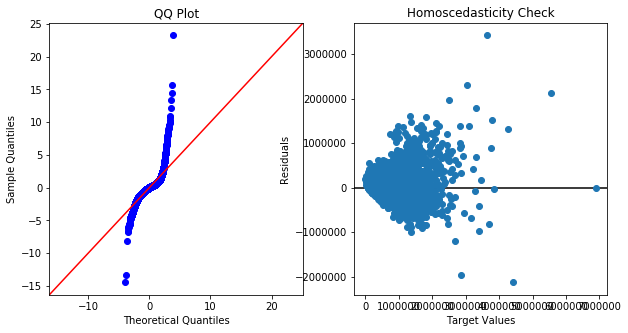

In [28]:
make_model(df, x_cols)

>**Observations:**
* The data has not been normalized and no outliers have been removed
* The first model yielded an R squared of .839
* The skew value of 2.383 suggests that the data distribution is highly skewed
* The kurtosis value of 42.8 indicates that the data distribution has heavy tails 
* The QQ plot shows us visually that we do not have normally distributed residuals and the tails have extreme values. 
* Homoscedasticity test shows hetroscedasticities and does not pass

## Log Transformation on Continuous Data 


In [29]:
#Creating a variable pulling all numeric columns 
df_log = df.copy()
num_cols = df_log.select_dtypes('number').columns

#Creating a for loop and applying log transformation to each column 
for feat in num_cols: 
    df_log[feat] = df_log[feat].map(lambda x: np.log(x))

df_log.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,sqft_living15,sqft_lot15,Age
0,12.309982,3,1.0,7.073270,8.639411,1.0,0.0,0,3,7,7.073270,0,0,98178,7.200425,8.639411,4.174387
1,13.195614,3,2.25,7.851661,8.887653,2.0,0.0,0,3,7,7.682482,1,1,98125,7.432484,8.941022,4.234107
2,12.100712,2,1.0,6.646391,9.210340,1.0,0.0,0,3,6,6.646391,0,0,98028,7.908387,8.994917,4.465908
3,13.311329,4,3.0,7.580700,8.517193,1.0,0.0,0,5,7,6.956545,1,0,98136,7.215240,8.517193,4.007333
4,13.142166,3,2.0,7.426549,8.997147,1.0,0.0,0,3,8,7.426549,0,0,98074,7.495542,8.923058,3.496508


## One-Hot Encoding for Categorical Data

In [30]:
#Create variable that holds categorical data
cat_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_basement', 'yr_renovated',
            'zipcode']

#Perform one-hot encoding on categorical data
dummies = pd.get_dummies(df_log[cat_cols], prefix=cat_cols, drop_first = True)

#Remove the orginal data from df
df_preprocessed = df_log.drop(cat_cols, axis=1)

#Concat df_pre with dummies 
df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)

#Preview the results 
print(df_preprocessed.shape)
df_preprocessed.head()


(21597, 138)


,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,Age,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1.0,view_1,condition_2,condition_3,condition_4,condition_5,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,sqft_basement_1,yr_renovated_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.309982,7.073270,8.639411,7.073270,7.200425,8.639411,4.174387,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,13.195614,7.851661,8.887653,7.682482,7.432484,8.941022,4.234107,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12.100712,6.646391,9.210340,6.646391,7.908387,8.994917,4.465908,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13.311329,7.580700,8.517193,6.956545,7.215240,8.517193,4.007333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,13.142166,7.426549,8.997147,7.426549,7.495542,8.923058,3.496508,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Constructing Model

In [31]:
# Create train-test dataset for model validation
train, test = train_test_split(df_preprocessed, test_size=0.2)

# Check datasets
print(train.shape, test.shape)

(17277, 138) (4320, 138)


>**Define Model Data**

In [32]:
#Clean the column names 

train.columns = [col.replace('.', '_') for col in train.columns]

#Define the Dependent Variable
outcome = 'price'

#Create the Columns List 
x_cols = list(train.columns)

#Remove the Dependent Variable 
x_cols.remove(outcome)

x_cols

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'Age',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_33',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bathrooms_0_75',
 'bathrooms_1_0',
 'bathrooms_1_25',
 'bathrooms_1_5',
 'bathrooms_1_75',
 'bathrooms_2_0',
 'bathrooms_2_25',
 'bathrooms_2_5',
 'bathrooms_2_75',
 'bathrooms_3_0',
 'bathrooms_3_25',
 'bathrooms_3_5',
 'bathrooms_3_75',
 'bathrooms_4_0',
 'bathrooms_4_25',
 'bathrooms_4_5',
 'bathrooms_4_75',
 'bathrooms_5_0',
 'bathrooms_5_25',
 'bathrooms_5_5',
 'bathrooms_5_75',
 'bathrooms_6_0',
 'bathrooms_6_25',
 'bathrooms_6_5',
 'bathrooms_6_75',
 'bathrooms_7_5',
 'bathrooms_7_75',
 'bathrooms_8_0',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_1_0',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_12',
 'grade_13',
 'grade_3',
 'grade_4

## Model 2: Log/Dummy Variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     962.7
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:42:30   Log-Likelihood:                 5250.5
No. Observations:               17277   AIC:                        -1.022e+04
Df Residuals:                   17139   BIC:                            -9155.
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.3483      0.131     56.096      0.000       7.092       7.605
sqft_living         0.2583      0.014     18.238      0.000       0.231       0.286
sqft_lot            0.0788      0.004     19.261      0.000       0.071       0.087
sqft_above          0.1746      0.014     12.448      0.000       0.147       0.202
sqft_living15       0.1576      0.008     20.840      0.000       0.143       0.172
sqft_lot15         -0.0219      0.004     -4.916      0.000      -0.031      -0.013
Age                -0.0317      0.003     -9.276      0.000      -0.038      -0.025
bedrooms_10        -0.1494      0.128     -1.164      0.245      -0.401       0.102
bedrooms_11         0.0795      0.181      0.440      0.660      -0.275       0.434
bedrooms_2         -0.0160      0.016     -1.029      0.303      -0.047       0.014
bedrooms_3         -0.0374      0.016     -2.377      0.017      -0.068      -0.007
bedrooms_33         0.0445      0.180      0.247      0.805      -0.309       0.398
bedrooms_4         -0.0367      0.016     -2.271      0.023      -0.068      -0.005
bedrooms_5         -0.0652      0.017     -3.833      0.000      -0.099      -0.032
bedrooms_6         -0.0769      0.021     -3.720      0.000      -0.117      -0.036
bedrooms_7         -0.1487      0.038     -3.890      0.000      -0.224      -0.074
bedrooms_8         -0.1318      0.056     -2.366      0.018      -0.241      -0.023
bedrooms_9         -0.1820      0.092     -1.971      0.049      -0.363      -0.001
bathrooms_0_75      0.2100      0.107      1.960      0.050   -3.56e-05       0.420
bathrooms_1_0       0.2268      0.104      2.184      0.029       0.023       0.430
bathrooms_1_25      0.1447      0.124      1.166      0.244      -0.099       0.388
bathrooms_1_5       0.2163      0.104      2.081      0.037       0.013       0.420
bathrooms_1_75      0.2331      0.104      2.244      0.025       0.029       0.437
bathrooms_2_0       0.2322      0.104      2.234      0.025       0.028       0.436
bathrooms_2_25      0.2471      0.104      2.377      0.017       0.043       0.451
bathrooms_2_5       0.2516      0.104      2.422      0.015       0.048       0.455
bathrooms_2_75      0.2632      0.104      2.530      0.011       0.059       0.467
bathrooms_3_0       0.2683      0.104      2.576      0.010       0.064       0.472
bathrooms_3_25      0.2847      0.104      2.730      0.006       0.080       0.489
bathrooms_3_5       0.2870      0.104      2.753      0.006       0.083       0.491
bathrooms_3_75      0.3275      0.105      3.111      0.002       0.121       0.534
bathrooms_4_0       0.3281      0.106      3.106      0.002       0.121       0.535
bathrooms_4_25      0.3753      0.107      3.521      0.000       0.166       0.584
bathrooms_4_5       0.2919      0.106      2.752      0.006

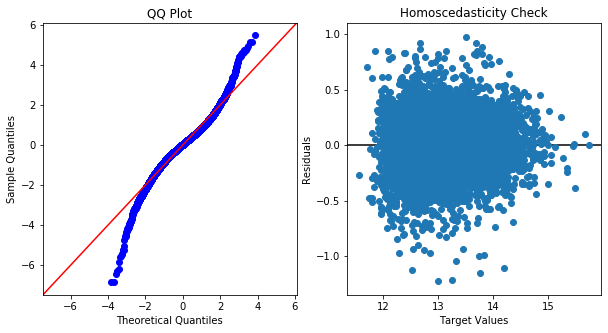

In [33]:
make_model(train, x_cols)

>**Observations:**
*  For Model 2, numeric data has been log transformed and dummy variables have been created for categorical data. 
* The 2nd Model yielded an R squared of .885
* The Skew level of -.201 shows that the data is symmetrical 
* The Kurtosis level of 5.779 is greater than 3 which is a  leptokurtic distribution. This type of distribution has longer and fatter tails. 
* QQ plot has improved alot but there are still extreme outliers present
* The plot shows no obvious cone shape pattern overall. Homoscedasticity assumption holds.


## Multicollinearity Check: VIF Method

In [34]:
#import vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
#set up equation
X = train.drop('price', axis=1)
X = sm.add_constant(X)
X

,const,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,Age,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0_75,bathrooms_1_0,bathrooms_1_25,bathrooms_1_5,bathrooms_1_75,bathrooms_2_0,bathrooms_2_25,bathrooms_2_5,bathrooms_2_75,bathrooms_3_0,bathrooms_3_25,bathrooms_3_5,bathrooms_3_75,bathrooms_4_0,bathrooms_4_25,bathrooms_4_5,bathrooms_4_75,bathrooms_5_0,bathrooms_5_25,bathrooms_5_5,bathrooms_5_75,bathrooms_6_0,bathrooms_6_25,bathrooms_6_5,bathrooms_6_75,bathrooms_7_5,bathrooms_7_75,bathrooms_8_0,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,waterfront_1_0,view_1,condition_2,condition_3,condition_4,condition_5,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,sqft_basement_1,yr_renovated_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
20402,1.0,8.271293,8.747193,8.048788,8.391630,8.702012,2.639057,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3276,1.0,7.122867,8.313852,7.122867,7.630461,8.313852,4.553877,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17235,1.0,7.816014,9.287301,7.816014,7.774856,9.333443,3.091042,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5993,1.0,7.506592,8.270013,7.506592,7.506592,8.259199,2.944439,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8105,1.0,7.358831,7.854381,7.358831,7.585789,7.990238,2.708050,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,1.0,7.478

In [35]:
#VIF method over 6 is considered to be high 
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_results = pd.Series(dict(zip(X.columns, vif)))
vif_results

const            9224.192774
sqft_living        19.363855
sqft_lot            7.194377
sqft_above         19.217947
sqft_living15       3.292452
                    ...     
zipcode_98177       1.690699
zipcode_98178       1.755970
zipcode_98188       1.375075
zipcode_98198       1.797246
zipcode_98199       1.950720
Length: 138, dtype: float64

In [36]:
#examining all columns with a vif value of over 6
threshold = 6
bad_vif = list(vif_results[vif_results>threshold].index)
bad_vif.remove('const')
bad_vif

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_lot15',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bathrooms_0_75',
 'bathrooms_1_0',
 'bathrooms_1_5',
 'bathrooms_1_75',
 'bathrooms_2_0',
 'bathrooms_2_25',
 'bathrooms_2_5',
 'bathrooms_2_75',
 'bathrooms_3_0',
 'bathrooms_3_25',
 'bathrooms_3_5',
 'bathrooms_3_75',
 'bathrooms_4_0',
 'bathrooms_4_25',
 'bathrooms_4_5',
 'bathrooms_4_75',
 'bathrooms_5_0',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_7',
 'grade_8']

>**Observation:**
* After log transformation and creating dummy variables, we see the following columns have a high VIF which is anything over 6 


>**Dropping all columns with a high VIF and setting up variables for next model output**

In [37]:
train.drop(bad_vif, axis=1, inplace=True)
display(train.head())
#Define the Dependent Variable
outcome = 'price'

#Create the Columns List 
x_cols = list(train.columns)

#Remove the Dependent Variable 
x_cols.remove(outcome)

x_cols

,price,sqft_living15,Age,bedrooms_10,bedrooms_11,bedrooms_33,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_1_25,bathrooms_5_25,bathrooms_5_5,bathrooms_5_75,bathrooms_6_0,bathrooms_6_25,bathrooms_6_5,bathrooms_6_75,bathrooms_7_5,bathrooms_7_75,bathrooms_8_0,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,waterfront_1_0,view_1,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_9,sqft_basement_1,yr_renovated_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
20402,13.472950,8.391630,2.639057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3276,13.345507,7.630461,4.553877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17235,13.369223,7.774856,3.091042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5993,12.706848,7.506592,2.944439,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8105,12.611371,7.585789,2.708050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


['sqft_living15',
 'Age',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_33',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bathrooms_1_25',
 'bathrooms_5_25',
 'bathrooms_5_5',
 'bathrooms_5_75',
 'bathrooms_6_0',
 'bathrooms_6_25',
 'bathrooms_6_5',
 'bathrooms_6_75',
 'bathrooms_7_5',
 'bathrooms_7_75',
 'bathrooms_8_0',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_1_0',
 'view_1',
 'grade_11',
 'grade_12',
 'grade_13',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_9',
 'sqft_basement_1',
 'yr_renovated_1',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zip

## Model 3: + Multicollinearity Columns Removed 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     692.8
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:42:54   Log-Likelihood:                 936.35
No. Observations:               17277   AIC:                            -1659.
Df Residuals:                   17170   BIC:                            -828.7
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.2850      0.062    133.829      0.000       8.164       8.406
sqft_living15       0.5593      0.008     70.656      0.000       0.544       0.575
Age                -0.0149      0.004     -4.032      0.000      -0.022      -0.008
bedrooms_10        -0.0334      0.163     -0.205      0.838      -0.353       0.286
bedrooms_11         0.2572      0.231      1.115      0.265      -0.195       0.709
bedrooms_33         0.2321      0.230      1.008      0.313      -0.219       0.683
bedrooms_6          0.1185      0.016      7.431      0.000       0.087       0.150
bedrooms_7          0.1009      0.044      2.297      0.022       0.015       0.187
bedrooms_8          0.1112      0.068      1.639      0.101      -0.022       0.244
bedrooms_9         -0.0423      0.116     -0.364      0.716      -0.270       0.185
bathrooms_1_25     -0.1844      0.087     -2.116      0.034      -0.355      -0.014
bathrooms_5_25      0.2464      0.088      2.804      0.005       0.074       0.419
bathrooms_5_5       0.2999      0.093      3.220      0.001       0.117       0.482
bathrooms_5_75      0.1224      0.136      0.904      0.366      -0.143       0.388
bathrooms_6_0       0.2705      0.119      2.272      0.023       0.037       0.504
bathrooms_6_25      0.9088      0.231      3.941      0.000       0.457       1.361
bathrooms_6_5       0.4193      0.164      2.557      0.011       0.098       0.741
bathrooms_6_75     -0.3031      0.235     -1.290      0.197      -0.764       0.158
bathrooms_7_5       0.0221      0.258      0.086      0.932      -0.483       0.528
bathrooms_7_75      0.2074      0.258      0.805      0.421      -0.298       0.712
bathrooms_8_0       0.0592      0.237      0.250      0.803      -0.405       0.524
floors_1_5          0.1084      0.007     16.031      0.000       0.095       0.122
floors_2_0          0.1081      0.005     19.921      0.000       0.097       0.119
floors_2_5          0.2256      0.021     10.684      0.000       0.184       0.267
floors_3_0          0.0044      0.013      0.335      0.738      -0.021       0.030
floors_3_5          0.1516      0.095      1.594      0.111      -0.035       0.338
waterfront_1_0      0.6077      0.023     26.274      0.000       0.562       0.653
view_1              0.1860      0.007     27.529      0.000       0.173       0.199
grade_11            0.4083      0.014     28.926      0.000       0.381       0.436
grade_12            0.5920      0.031     18.959      0.000       0.531       0.653
grade_13            0.7575      0.110      6.905      0.000       0.542       0.973
grade_3             0.1136      0.231      0.493      0.622      -0.338       0.566
grade_4            -0.4207      0.052     -8.128      0.000      -0.522      -0.319
grade_5            -0.2902      0.017    -17.022      0.000

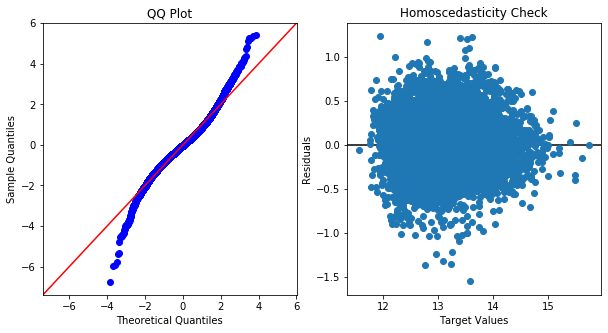

In [38]:
make_model(train, x_cols)


>**Observations:**
*  For Model 3, we observed the multicollinearity using the VIF method and removed any values higher than 6
* The 3rd Model yielded an R squared of .810 which is much lower than model 2 = .885
* The Skew level of .112 shows that the data is symmetrical and has improved from model 2
* The Kurtosis level of 5.043 is greater than 3 which is a  leptokurtic distribution. This type of distribution has longer and fatter tails. Small improvement from model 2
* QQ plot has improved 
* The plot shows no obvious cone shape pattern overall. Homoscedasticity assumption holds.


## Model 4: Removing P-Values 

**Removing P-Values**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     692.8
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:42:55   Log-Likelihood:                 936.35
No. Observations:               17277   AIC:                            -1659.
Df Residuals:                   17170   BIC:                            -828.7
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.2850      0.062    133.829      0.000       8.164       8.406
sqft_living15       0.5593      0.008     70.656      0.000       0.544       0.575
Age                -0.0149      0.004     -4.032      0.000      -0.022      -0.008
bedrooms_10        -0.0334      0.163     -0.205      0.838      -0.353       0.286
bedrooms_11         0.2572      0.231      1.115      0.265      -0.195       0.709
bedrooms_33         0.2321      0.230      1.008      0.313      -0.219       0.683
bedrooms_6          0.1185      0.016      7.431      0.000       0.087       0.150
bedrooms_7          0.1009      0.044      2.297      0.022       0.015       0.187
bedrooms_8          0.1112      0.068      1.639      0.101      -0.022       0.244
bedrooms_9         -0.0423      0.116     -0.364      0.716      -0.270       0.185
bathrooms_1_25     -0.1844      0.087     -2.116      0.034      -0.355      -0.014
bathrooms_5_25      0.2464      0.088      2.804      0.005       0.074       0.419
bathrooms_5_5       0.2999      0.093      3.220      0.001       0.117       0.482
bathrooms_5_75      0.1224      0.136      0.904      0.366      -0.143       0.388
bathrooms_6_0       0.2705      0.119      2.272      0.023       0.037       0.504
bathrooms_6_25      0.9088      0.231      3.941      0.000       0.457       1.361
bathrooms_6_5       0.4193      0.164      2.557      0.011       0.098       0.741
bathrooms_6_75     -0.3031      0.235     -1.290      0.197      -0.764       0.158
bathrooms_7_5       0.0221      0.258      0.086      0.932      -0.483       0.528
bathrooms_7_75      0.2074      0.258      0.805      0.421      -0.298       0.712
bathrooms_8_0       0.0592      0.237      0.250      0.803      -0.405       0.524
floors_1_5          0.1084      0.007     16.031      0.000       0.095       0.122
floors_2_0          0.1081      0.005     19.921      0.000       0.097       0.119
floors_2_5          0.2256      0.021     10.684      0.000       0.184       0.267
floors_3_0          0.0044      0.013      0.335      0.738      -0.021       0.030
floors_3_5          0.1516      0.095      1.594      0.111      -0.035       0.338
waterfront_1_0      0.6077      0.023     26.274      0.000       0.562       0.653
view_1              0.1860      0.007     27.529      0.000       0.173       0.199
grade_11            0.4083      0.014     28.926      0.000       0.381       0.436
grade_12            0.5920      0.031     18.959      0.000       0.531       0.653
grade_13            0.7575      0.110      6.905      0.000       0.542       0.973
grade_3             0.1136      0.231      0.493      0.622      -0.338       0.566
grade_4            -0.4207      0.052     -8.128      0.000      -0.522      -0.319
grade_5            -0.2902      0.017    -17.022      0.000

[Text(0, 0.5, 'Residuals'),
 Text(0.5, 0, 'Target Values'),
 Text(0.5, 1.0, 'Homoscedasticity Check')]

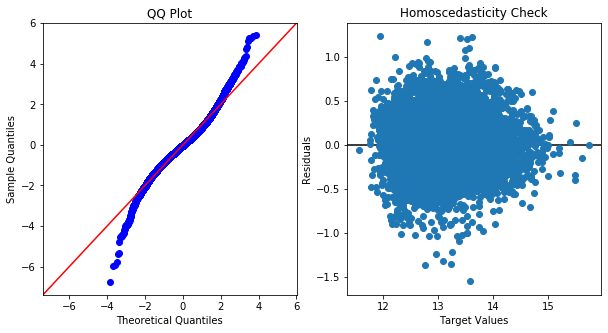

In [39]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
display(model.summary())
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
fig = sm.graphics.qqplot(model.resid, stats.distributions.norm, fit=True, line='45', ax=ax[0])
ax[0].set(title='QQ Plot')
ax[1].scatter(x=model.predict(), y=model.resid)
ax[1].axhline(0,color='k',zorder=-1)
ax[1].set(ylabel='Residuals',title='Homoscedasticity Check', xlabel="Target Values")

In [40]:
#removing high p-values
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
number = print(len(p_table), len(x_cols))
top_5 = print(x_cols[:5])
table = display(p_table.head())

107 89
['sqft_living15', 'Age', 'bedrooms_6', 'bedrooms_7', 'bathrooms_1_25']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,8.2850,0.062,133.829,0.000,8.164,8.406
sqft_living15,0.5593,0.008,70.656,0.000,0.544,0.575
Age,-0.0149,0.004,-4.032,0.000,-0.022,-0.008
bedrooms_10,-0.0334,0.163,-0.205,0.838,-0.353,0.286
bedrooms_11,0.2572,0.231,1.115,0.265,-0.195,0.709


**Model 4 with Updates** (No high p-values)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     824.8
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:42:57   Log-Likelihood:                 926.45
No. Observations:               17277   AIC:                            -1673.
Df Residuals:                   17187   BIC:                            -974.8
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3034      0.060    138.013      0.000       8.185       8.421
sqft_living15       0.5581      0.008     70.697      0.000       0.543       0.574
Age                -0.0156      0.003     -4.751      0.000      -0.022      -0.009
bedrooms_6          0.1206      0.016      7.581      0.000       0.089       0.152
bedrooms_7          0.0967      0.042      2.292      0.022       0.014       0.179
bathrooms_1_25     -0.1845      0.087     -2.117      0.034      -0.355      -0.014
bathrooms_5_25      0.2436      0.088      2.771      0.006       0.071       0.416
bathrooms_5_5       0.2881      0.092      3.126      0.002       0.107       0.469
bathrooms_6_0       0.2909      0.118      2.471      0.013       0.060       0.522
bathrooms_6_25      0.9105      0.231      3.948      0.000       0.458       1.362
bathrooms_6_5       0.4139      0.164      2.524      0.012       0.093       0.735
floors_1_5          0.1081      0.007     16.074      0.000       0.095       0.121
floors_2_0          0.1074      0.005     21.504      0.000       0.098       0.117
floors_2_5          0.2236      0.021     10.674      0.000       0.183       0.265
waterfront_1_0      0.6069      0.023     26.259      0.000       0.562       0.652
view_1              0.1866      0.007     27.676      0.000       0.173       0.200
grade_11            0.4076      0.014     28.938      0.000       0.380       0.435
grade_12            0.6008      0.031     19.653      0.000       0.541       0.661
grade_13            0.7955      0.099      8.006      0.000       0.601       0.990
grade_4            -0.4221      0.052     -8.155      0.000      -0.524      -0.321
grade_5            -0.2892      0.017    -16.992      0.000      -0.323      -0.256
grade_6            -0.1427      0.007    -21.027      0.000      -0.156      -0.129
grade_9             0.1478      0.006     24.800      0.000       0.136       0.160
sqft_basement_1     0.0727      0.004     17.721      0.000       0.065       0.081
yr_renovated_1      0.1143      0.010     11.527      0.000       0.095       0.134
zipcode_98004       1.1697      0.016     73.108      0.000       1.138       1.201
zipcode_98005       0.7935      0.021     38.412      0.000       0.753       0.834
zipcode_98006       0.6758      0.014     49.189      0.000       0.649       0.703
zipcode_98007       0.6772      0.022     30.263      0.000       0.633       0.721
zipcode_98008       0.6897      0.017     41.477      0.000       0.657       0.722
zipcode_98010       0.3278      0.028     11.868      0.000       0.274       0.382
zipcode_98011       0.4142      0.019     21.763      0.000       0.377       0.451
zipcode_98014       0.3819      0.024     15.657      0.000       0.334       0.430
zipcode_98019       0.3039      0.020     15.171      0.000

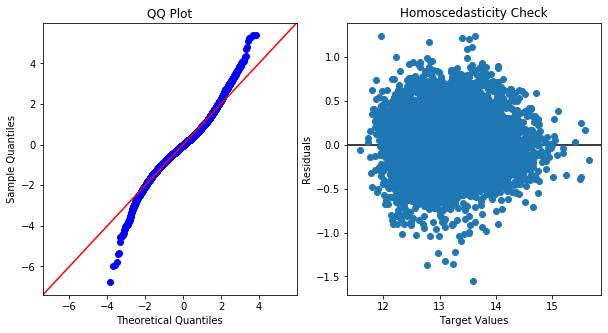

In [41]:
final_model = make_model(train, x_cols)
final_model

>**Observations:**
*  For Model 4, we removed p-values over .05
* The 4th Model yielded an R squared of .810 which is equal to model 3
* The Skew level of .111 shows that the data is symmetrical
* The Kurtosis level of 5.038 is greater than 3 which is a  leptokurtic distribution. This type of distribution has longer and fatter tails
* QQ plot has improved 
* The plot shows no obvious cone shape pattern overall. Homoscedasticity assumption holds.


# Model Validation 

In [42]:
#model validation using train_test_split 
from sklearn.model_selection import train_test_split 
train_df, test_df = train_test_split(train, test_size=.2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     824.8
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:42:58   Log-Likelihood:                 926.45
No. Observations:               17277   AIC:                            -1673.
Df Residuals:                   17187   BIC:                            -974.8
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3034      0.060    138.013      0.000       8.185       8.421
sqft_living15       0.5581      0.008     70.697      0.000       0.543       0.574
Age                -0.0156      0.003     -4.751      0.000      -0.022      -0.009
bedrooms_6          0.1206      0.016      7.581      0.000       0.089       0.152
bedrooms_7          0.0967      0.042      2.292      0.022       0.014       0.179
bathrooms_1_25     -0.1845      0.087     -2.117      0.034      -0.355      -0.014
bathrooms_5_25      0.2436      0.088      2.771      0.006       0.071       0.416
bathrooms_5_5       0.2881      0.092      3.126      0.002       0.107       0.469
bathrooms_6_0       0.2909      0.118      2.471      0.013       0.060       0.522
bathrooms_6_25      0.9105      0.231      3.948      0.000       0.458       1.362
bathrooms_6_5       0.4139      0.164      2.524      0.012       0.093       0.735
floors_1_5          0.1081      0.007     16.074      0.000       0.095       0.121
floors_2_0          0.1074      0.005     21.504      0.000       0.098       0.117
floors_2_5          0.2236      0.021     10.674      0.000       0.183       0.265
waterfront_1_0      0.6069      0.023     26.259      0.000       0.562       0.652
view_1              0.1866      0.007     27.676      0.000       0.173       0.200
grade_11            0.4076      0.014     28.938      0.000       0.380       0.435
grade_12            0.6008      0.031     19.653      0.000       0.541       0.661
grade_13            0.7955      0.099      8.006      0.000       0.601       0.990
grade_4            -0.4221      0.052     -8.155      0.000      -0.524      -0.321
grade_5            -0.2892      0.017    -16.992      0.000      -0.323      -0.256
grade_6            -0.1427      0.007    -21.027      0.000      -0.156      -0.129
grade_9             0.1478      0.006     24.800      0.000       0.136       0.160
sqft_basement_1     0.0727      0.004     17.721      0.000       0.065       0.081
yr_renovated_1      0.1143      0.010     11.527      0.000       0.095       0.134
zipcode_98004       1.1697      0.016     73.108      0.000       1.138       1.201
zipcode_98005       0.7935      0.021     38.412      0.000       0.753       0.834
zipcode_98006       0.6758      0.014     49.189      0.000       0.649       0.703
zipcode_98007       0.6772      0.022     30.263      0.000       0.633       0.721
zipcode_98008       0.6897      0.017     41.477      0.000       0.657       0.722
zipcode_98010       0.3278      0.028     11.868      0.000       0.274       0.382
zipcode_98011       0.4142      0.019     21.763      0.000       0.377       0.451
zipcode_98014       0.3819      0.024     15.657      0.000       0.334       0.430
zipcode_98019       0.3039      0.020     15.171      0.000

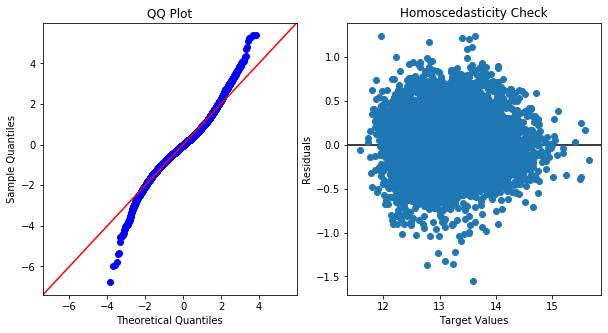

In [43]:
make_model(train, x_cols)

In [66]:
#we compare the R2 train data against the test data
from sklearn.metrics import r2_score
train_pred = model.predict(train_df)
test_pred = model.predict(test_df)

In [67]:
r2_train = r2_score(train_df['price'], train_pred)
r2_test = r2_score(test_df['price'], test_pred)
r2_train, r2_test

(0.8092063399671812, 0.815553161382937)

>**Observations:**

Let's review our final model; 
* Log transformed numerical data
* Created dummy variables for Categorical data
* Used the VIF method for multicollinearity and removed any columns with values over 6
* Removed columns with p-values over .05
* R squared is equal to .810, Skew is equal to .111 and Kurtosis is equal to 5.038. 
* For model validation, we used the train test split and with the difference of R2 scores equal to .006, the model appears to not be under or over fitted.  

 # Model Coefficient Intrepretations 

In [46]:
#reviewing final model summary
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     824.8
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:42:59   Log-Likelihood:                 926.45
No. Observations:               17277   AIC:                            -1673.
Df Residuals:                   17187   BIC:                            -974.8
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3034      0.060    138.013      0.000       8.185       8.421
sqft_living15       0.5581      0.008     70.697      0.000       0.543       0.574
Age                -0.0156      0.003     -4.751      0.000      -0.022      -0.009
bedrooms_6          0.1206      0.016      7.581      0.000       0.089       0.152
bedrooms_7          0.0967      0.042      2.292      0.022       0.014       0.179
bathrooms_1_25     -0.1845      0.087     -2.117      0.034      -0.355      -0.014
bathrooms_5_25      0.2436      0.088      2.771      0.006       0.071       0.416
bathrooms_5_5       0.2881      0.092      3.126      0.002       0.107       0.469
bathrooms_6_0       0.2909      0.118      2.471      0.013       0.060       0.522
bathrooms_6_25      0.9105      0.231      3.948      0.000       0.458       1.362
bathrooms_6_5       0.4139      0.164      2.524      0.012       0.093       0.735
floors_1_5          0.1081      0.007     16.074      0.000       0.095       0.121
floors_2_0          0.1074      0.005     21.504      0.000       0.098       0.117
floors_2_5          0.2236      0.021     10.674      0.000       0.183       0.265
waterfront_1_0      0.6069      0.023     26.259      0.000       0.562       0.652
view_1              0.1866      0.007     27.676      0.000       0.173       0.200
grade_11            0.4076      0.014     28.938      0.000       0.380       0.435
grade_12            0.6008      0.031     19.653      0.000       0.541       0.661
grade_13            0.7955      0.099      8.006      0.000       0.601       0.990
grade_4            -0.4221      0.052     -8.155      0.000      -0.524      -0.321
grade_5            -0.2892      0.017    -16.992      0.000      -0.323      -0.256
grade_6            -0.1427      0.007    -21.027      0.000      -0.156      -0.129
grade_9             0.1478      0.006     24.800      0.000       0.136       0.160
sqft_basement_1     0.0727      0.004     17.721      0.000       0.065       0.081
yr_renovated_1      0.1143      0.010     11.527      0.000       0.095       0.134
zipcode_98004       1.1697      0.016     73.108      0.000       1.138       1.201
zipcode_98005       0.7935      0.021     38.412      0.000       0.753       0.834
zipcode_98006       0.6758      0.014     49.189      0.000       0.649       0.703
zipcode_98007       0.6772      0.022     30.263      0.000       0.633       0.721
zipcode_98008       0.6897      0.017     41.477      0.000       0.657       0.722
zipcode_98010       0.3278      0.028     11.868      0.000       0.274       0.382
zipcode_98011       0.4142      0.019     21.763      0.000       0.377       0.451
zipcode_98014       0.3819      0.024     15.657      0.000       0.334       0.430
zipcode_98019       0.3039      0.020     15.171      0.000

In [47]:
#creating a variable that holds the coefficients from the final model 
# source: https://zhiyzuo.github.io/Python-Plot-Regression-Coefficient/
err_series = final_model.params - final_model.conf_int()[0]
err_series

Intercept        0.117928
sqft_living15    0.015473
Age              0.006427
bedrooms_6       0.031176
bedrooms_7       0.082698
                   ...   
zipcode_98177    0.034884
zipcode_98178    0.033436
zipcode_98188    0.044410
zipcode_98198    0.032068
zipcode_98199    0.031619
Length: 90, dtype: float64

In [48]:
coef_df = pd.DataFrame({'coef': final_model.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df = coef_df.sort_values('coef', ascending = False)
coef_df

,coef,err,varname
43,1.341318,0.071136,zipcode_98039
24,1.169661,0.031360,zipcode_98004
67,1.029459,0.034194,zipcode_98112
66,0.971270,0.048613,zipcode_98109
44,0.934656,0.033446,zipcode_98040
...,...,...,...
1,-0.015578,0.006427,Age
20,-0.142673,0.013300,grade_6
4,-0.184518,0.170865,bathrooms_1_25
19,-0.289201,0.033362,grade_5


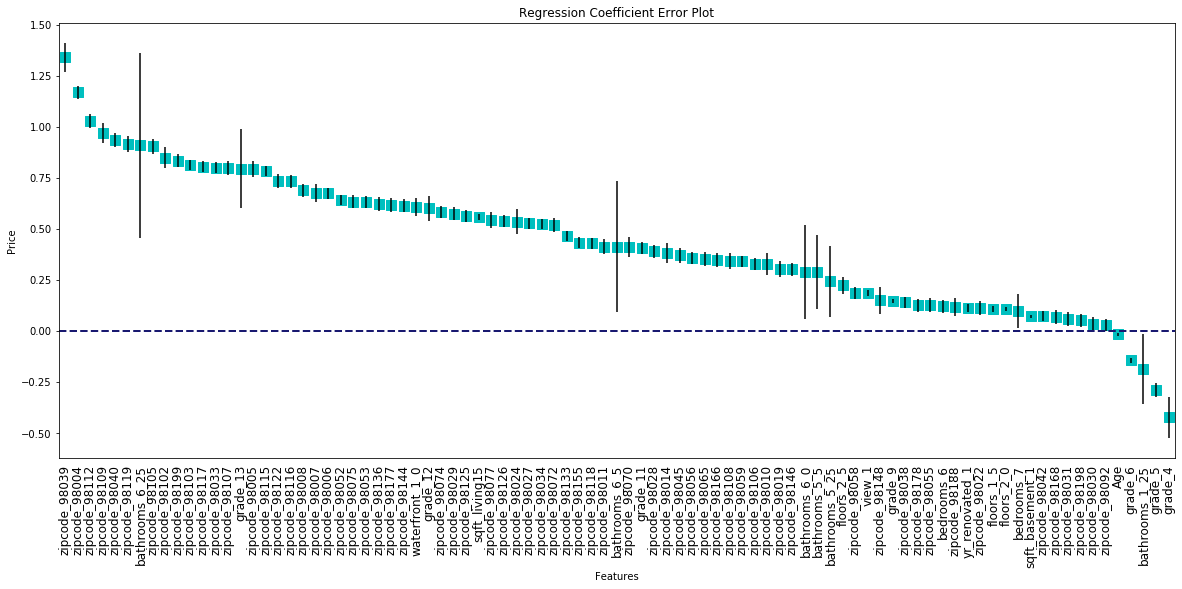

In [49]:
fig, ax = plt.subplots(figsize=(20, 8))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('Price')
ax.set_xlabel('Features')
ax.set_title('Regression Coefficient Error Plot')
ax.set_facecolor('none')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='c')
ax.axhline(y=0, linestyle='--', color='midnightblue', linewidth=2)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(coef_df.varname, 
                       rotation=90, fontsize=12)

The lowest (negative) influence observed are Age(assume normal depreciation), condition_2, bathroom_1_25, grade_4, grade_5, grade_6.  

## Age Coefficient

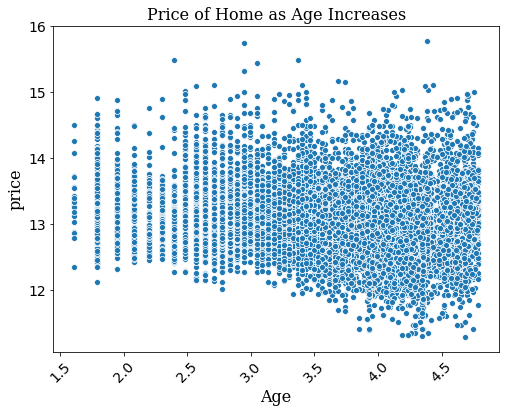

In [51]:
plt.figure(figsize=(8, 6))

font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Price', fontdict=font_dict)
plt.ylabel('Age', fontdict=font_dict)
plt.title('Price of Home as Age Increases', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)

sns.scatterplot('Age','price', data = train_df)

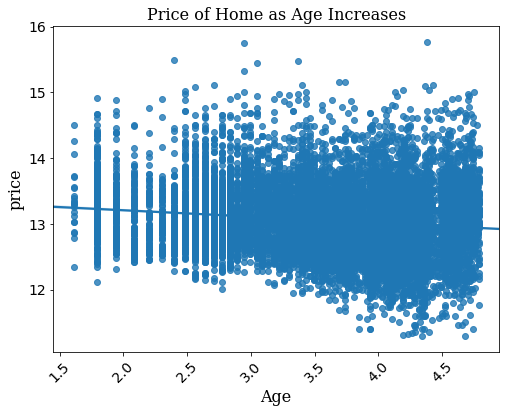

In [52]:
plt.figure(figsize=(8, 6))

font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Price', fontdict=font_dict)
plt.ylabel('Age', fontdict=font_dict)
plt.title('Price of Home as Age Increases', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)
sns.regplot('Age','price', data = train_df)

>**Observations:**
* The plot above shows that as the house gets older, there is a slight decline in selling price.
* The Age coefficient of -.0156 translates to as a house increases in age by 1 year, the selling price decreases by -1.56 percent. 
* **Recommendation:** Although not a huge decrease in selling price as the house gets older, but waiting too long could ultimately be a significant hit. If you have decided to sell, try to sell within the next 5 years. 

## Waterfront Coefficient

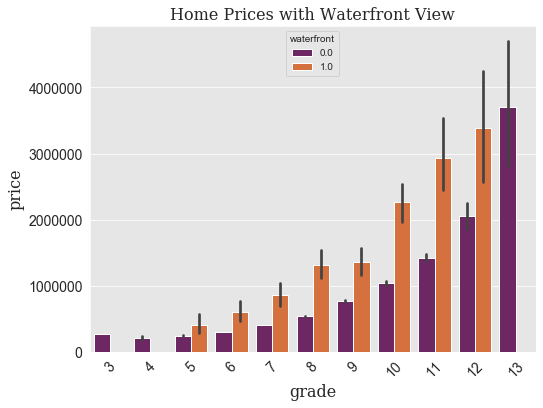

In [68]:
plt.figure(figsize=(8, 6))
in_order = ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Price', fontdict=font_dict)
plt.ylabel('Grade', fontdict=font_dict)
plt.title('Home Prices with Waterfront View', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)

sns.barplot(x=df.loc[~(df['grade']==0),'grade'],y=df['price'], hue=df['waterfront'], palette = "inferno", order= in_order)

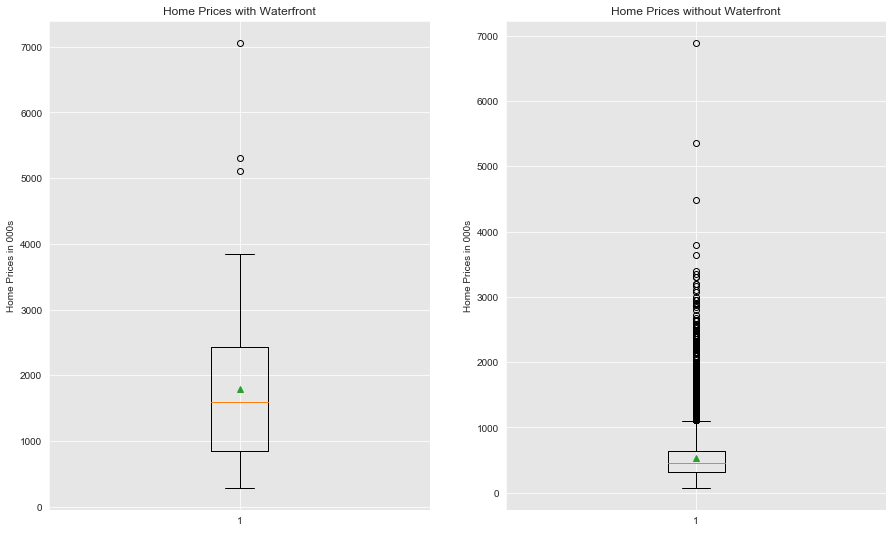

In [54]:
water_no = np.exp(train_df[train_df['waterfront_1_0'] == 0]['price'])/1000
water_yes = np.exp(train_df[train_df['waterfront_1_0'] == 1]['price'])/1000
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 9))
ax1.boxplot(water_yes, showmeans=True)
ax1.set_ylabel('Home Prices in 000s')
ax1.set_title('Home Prices with Waterfront')
ax2.boxplot(water_no, showmeans=True)
ax2.set_ylabel('Home Prices in 000s')
ax2.set_title('Home Prices without Waterfront')
plt.show()

>**Observations:**
* The plot above shows that houses with a waterfront cost more than houses without a waterfront
* The waterfront_1_0's coefficient of .6069 shows that the sale price of your home can increase by almost 61% if by a waterfront. 
* **Recommendation:** If near a waterfront, it is highly recommended to sale your home due to the high premium

## View_1 Coefficient

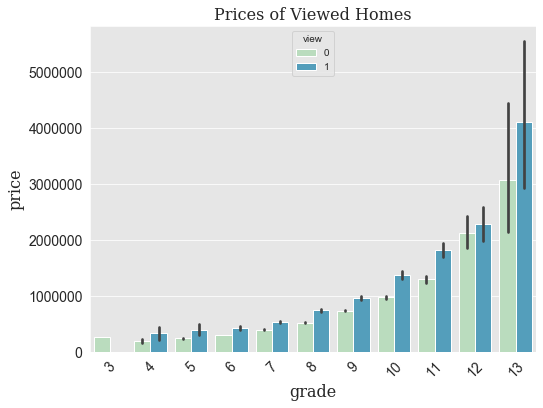

In [55]:
plt.figure(figsize=(8, 6))
in_order = ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Price', fontdict=font_dict)
plt.ylabel('Grade', fontdict=font_dict)
plt.title('Prices of Viewed Homes', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)
sns.barplot(x=df.loc[~(df['grade']==0),'grade'],y=df['price'], hue=df['view'], palette = "GnBu", order=in_order)

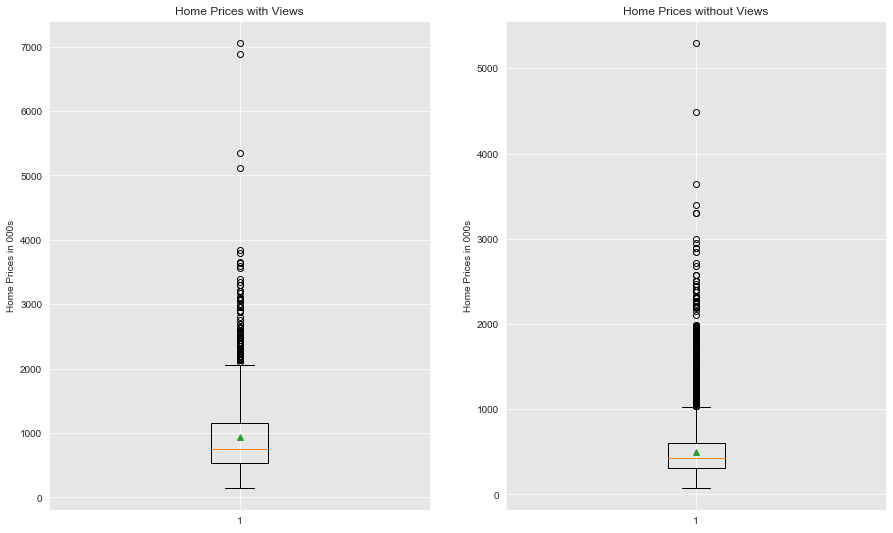

In [56]:
no_view = np.exp(train_df[train_df['view_1'] == 0]['price'])/1000
view = np.exp(train_df[train_df['view_1'] == 1]['price'])/1000
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 9))
ax1.boxplot(view, showmeans=True)
ax1.set_ylabel('Home Prices in 000s')
ax1.set_title('Home Prices with Views')
ax2.boxplot(no_view, showmeans=True)
ax2.set_ylabel('Home Prices in 000s')
ax2.set_title('Home Prices without Views')
plt.show()

>**Observations:**
* The plot above shows that if your house has been viewed, it will increase your selling price. 
* The coefficient of view_1 is .1866 which translates to increasing selling price by almost 19%
* **Recommendation:** To get your house to be viewed by multiple buyers, you need to invest in various modes of marketing. This includes professional photography, professional videography and a experienced agent to show your home. First impression is a lasting one. 

## Grade Coefficient

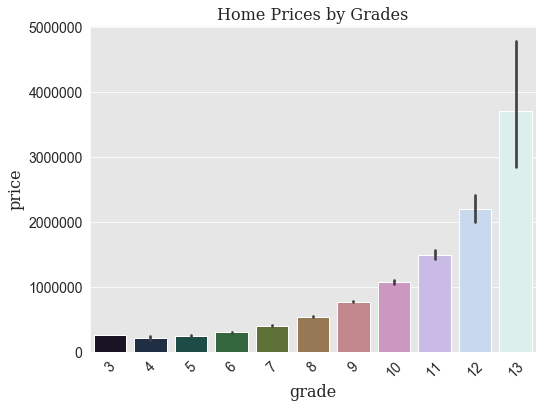

In [57]:
plt.figure(figsize=(8, 6))
in_order = ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Price', fontdict=font_dict)
plt.ylabel('Grade', fontdict=font_dict)
plt.title('Home Prices by Grades', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)

sns.barplot(x=df.loc[~(df['grade']==0),'grade'],y=df['price'], palette = "cubehelix", order=in_order)

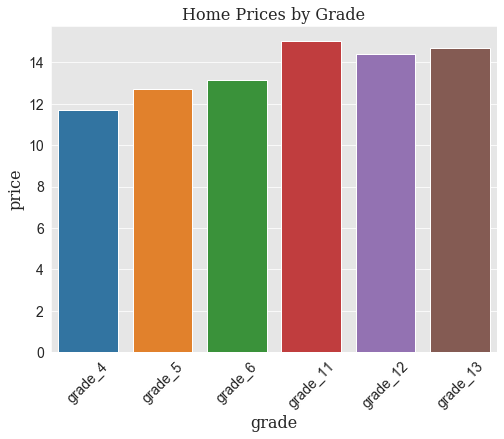

In [58]:
plt.figure(figsize=(8, 6))
font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Price', fontdict=font_dict)
plt.ylabel('Grade', fontdict=font_dict)
plt.title('Home Prices by Grade', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)



g4 = train_df[train_df['grade_4'] == 1]['price'].values[0]
g5 = train_df[train_df['grade_5'] == 1]['price'].values[0]
g6 = train_df[train_df['grade_6'] == 1]['price'].values[0]
g11 = train_df[train_df['grade_11'] == 1]['price'].values[0]
g12 = train_df[train_df['grade_12'] == 1]['price'].values[0]
g13 = train_df[train_df['grade_13'] == 1]['price'].values[0]

grades = pd.DataFrame([{'grade':'grade_4','price': g4}, {'grade':'grade_5','price': g5}, 
                    {'grade':'grade_6','price': g6}, {'grade':'grade_11','price': g11},
                    {'grade':'grade_12','price': g12},{'grade':'grade_13','price': g13}])


sns.barplot('grade', 'price', data=grades)

>**Observations:**
* Based on the King County grading system, the dataset has grades from 3 to 13 with grade 13 being the highest. 
* The model reports back that grades 11-13 can increase sale price from 41-80 percent, and grades 4-6 can decrease your sale price from 42-14 percent
* The plot above shows the differences in home prices between grades 3-13
* According to King County documents, classification by construction quality refers to the types of materials used and the quality of workmanship. 
* **Recommendation:** renovate your home with better quality materials and workmanship to improve your grade. 

## Sqft_basement_1 Coefficient

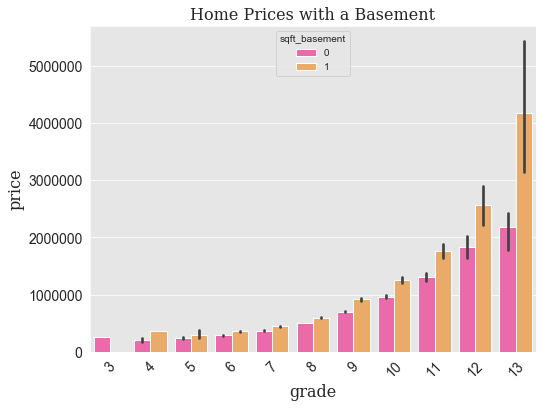

In [59]:
plt.figure(figsize=(8, 6))
in_order = ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Price', fontdict=font_dict)
plt.ylabel('Grade', fontdict=font_dict)
plt.title('Home Prices with a Basement', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)

sns.barplot(x=df.loc[~(df['grade']==0),'grade'],y=df['price'], hue=df['sqft_basement'], palette = "spring", order=in_order)

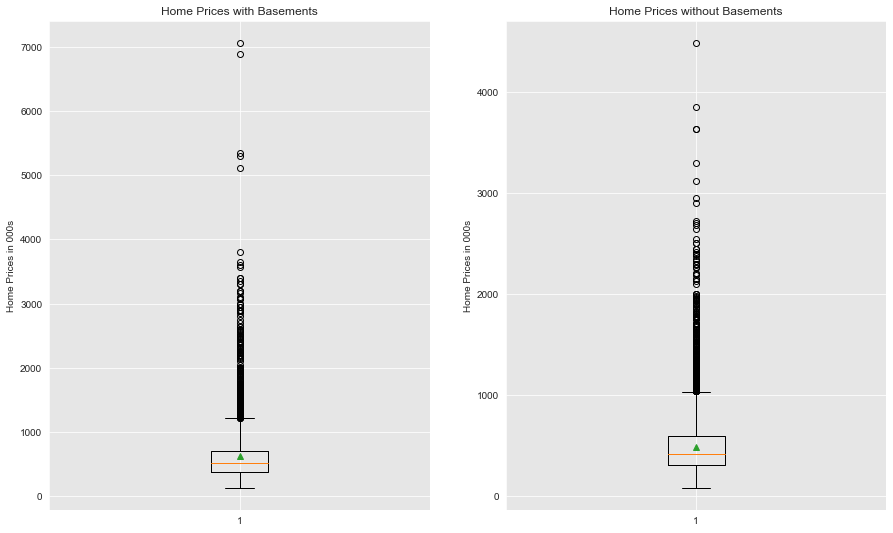

In [60]:
no_base = np.exp(train_df[train_df['sqft_basement_1'] == 0]['price'])/1000
base = np.exp(train_df[train_df['sqft_basement_1'] == 1]['price'])/1000
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 9))
ax1.boxplot(base, showmeans=True)
ax1.set_ylabel('Home Prices in 000s')
ax1.set_title('Home Prices with Basements')
ax2.boxplot(no_base, showmeans=True)
ax2.set_ylabel('Home Prices in 000s')
ax2.set_title('Home Prices without Basements')
plt.show()

>**Observations:**
* The plot above shows houses with a basement increase sale price. 
* The sqft_basement_1 coefficient of .0727 translates to increasing sale price by over 7%. 
* **Recommendation:** If you have a basement, showcase it. House hunters would love to know if homes have extra storage space, possible hangout spots or bunker for any situation. 

## Yr_Renovated_1 Coefficient

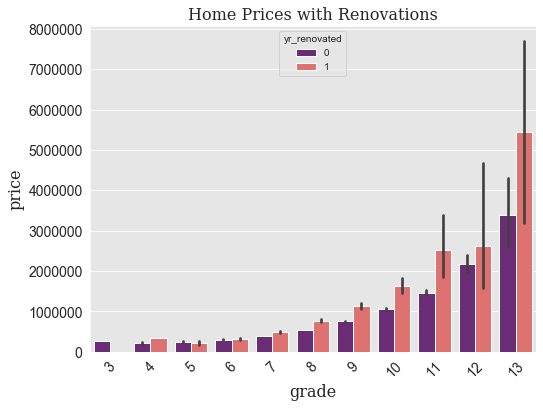

In [61]:
plt.figure(figsize=(8, 6))
in_order = ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Price', fontdict=font_dict)
plt.ylabel('Grade', fontdict=font_dict)
plt.title('Home Prices with Renovations', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)
sns.barplot(x=df.loc[~(df['grade']==0),'grade'],y=df['price'], hue=df['yr_renovated'], palette = "magma", order=in_order)

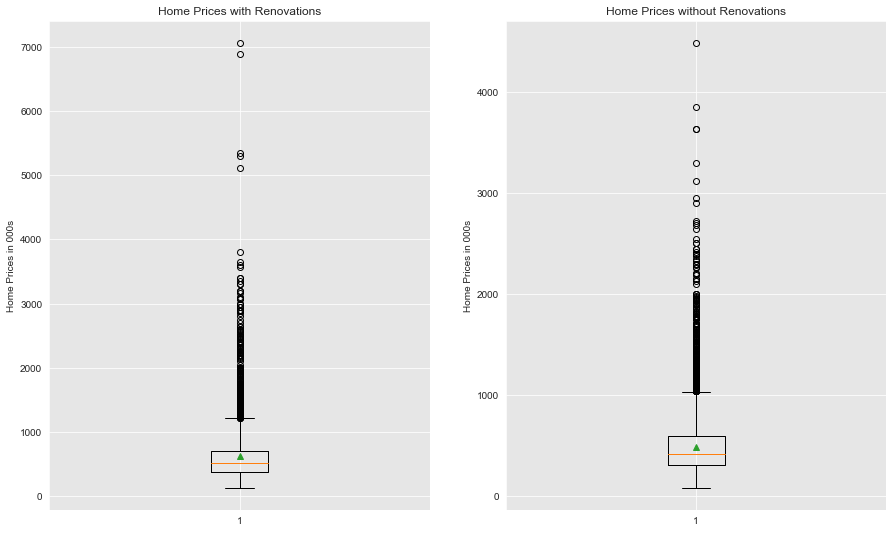

In [62]:
no_reno = np.exp(train_df[train_df['sqft_basement_1'] == 0]['price'])/1000
reno = np.exp(train_df[train_df['sqft_basement_1'] == 1]['price'])/1000
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 9))
ax1.boxplot(reno, showmeans=True)
ax1.set_ylabel('Home Prices in 000s')
ax1.set_title('Home Prices with Renovations')
ax2.boxplot(no_reno, showmeans=True)
ax2.set_ylabel('Home Prices in 000s')
ax2.set_title('Home Prices without Renovations')
plt.show()

>**Observations:**
* The plot shows if your home has been renovated, then the selling price will be higher than a house that is not renovated. 
* With yr_renovated_1 coefficient equal to .1143, that value translates to a increase in sale price by almost 12% .
* **Recommendation:** This value goes hand in hand with King County's Grading system. If you were to renovate your home with high quality materials and achieve a higher overall grade, then the selling price of your home with grow exponentially. 

# Conclusion

    Because the linear regressions model that was produced has a 81% predicting power, we are confident in the following recommendations. 
    
    Determine if you home is considered to have a water front, if so, the price of your home will increase in value just by checking that box. Next, evaluate your home and determine where renovations are needed. Using quality materials combined with high workmanship will result in a higher grade given by King County and can significantly increase the selling price of the house. 
    
    Last but not least, advertise your home with professional photos and videos and an experience real estate agent to generate hype. If you have a basement, market it. You never know what people love. The more views you get, the higher the chance consumers will not only bid, but will need to bid higher to out bid their competitors. 
    
    Making the decision to sell your home can be an exhausting one. Taking into consideration the above recommendations will put your mind at ease. Remember, this decision can be a long process and you want to be mindful of your time line as waiting 10-20 years can depreciate your house by a significant amount. 

# Future Work

The next steps to improve our model would be to decipher which locations/neighborhoods impact our house value and reanalyzing the square footage of a home compared to price. Also market analysis on when is the best time to sell your home. 